# Example data analysis

A small sample of data from an MD simulation of BPTI is analysed against the Shaw et al data.

In [1]:
# In this cell we use the pyPcazip library to do the PCA.
from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
%matplotlib inline
import matplotlib.pyplot as plt
f = Fasu('bpti_ca_1ms_dt10ns.xtc', top='bpti_ca.pdb')
c = Cofasu(f)
print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

/Users/pazcal/miniconda3/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


(103125, 58, 3)


/Users/pazcal/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/Users/pazcal/miniconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log
  del sys.path[0]


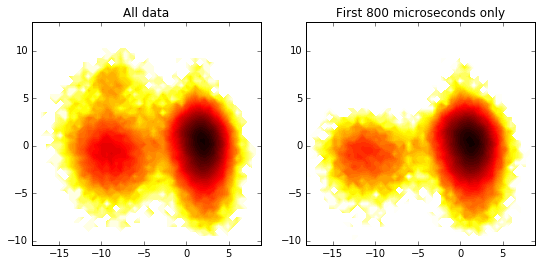

In [2]:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
import numpy as np
plt.figure(figsize=(9, 4))
plt.subplot(1,2,1)
z,x,y = np.histogram2d(p.projs[0],p.projs[3], bins=50)
F = -np.log(z)
extent = [x[0], x[-1], y[0], y[-1]]
plt.title('All data')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
plt.subplot(1,2,2)
z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
F = -np.log(z)
plt.title('First 800 microseconds only')
plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)

Right. Now let's see how a new sample of MD data explores this space. The trajectory data we will use needs to be imported, stripped down to just the C-alpha atos, and then projected into the PC subspace defioned by the Shaw et al data. Then we produce a plot to see how it samples it.

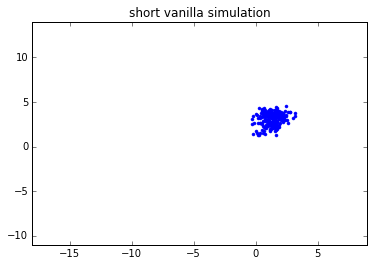

In [3]:
newtraj = 'example_data/bptib.xtc'
newtop = 'example_data/bpti.pdb'
newf = Fasu(newtraj, top=newtop, selection='name CA')
newc = Cofasu(newf)
p14 = []
for i in range(len(newc)):
    p14.append(p.map(newc[i])[[0,3]])
p14 = np.array(p14).T
plt.xlim((-18, 9))
plt.ylim((-11, 14))
plt.title('short vanilla simulation')
plt.plot(p14[0], p14[1], '.')

### New: example of how to find the snapshot in the new md dataset that is closest to snapshot 80000 in the Shaw dataset:

In [11]:
from MDPlus import fastfitting
target_structure = c[80000]
rmsds = fastfitting.rmsd_traj(newc, target_structure)
print 'The closest match to the target was snapshot {} with rmsd {:4.2f} angstroms'.format(np.argmin(rmsds), rmsds.min())

The closest match to the target was snapshot 203 with rmsd 0.71 angstroms


## Conclusions 

This dataset is firmly in the main conformational basin. Not surprising, as it comes from a simple and short simulation. Let's hope CoCo-MD can do better!